# Imports

In [1]:
# imports
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import pickle

import plotly.io
plotly.io.templates.default = "plotly_white"
import plotly
plotly.offline.init_notebook_mode()

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.calibration import CalibrationDisplay

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import scikitplot as skplt

import utilities as util

## Load Models

In [2]:
rfc_models = pickle.load(open('./models/weasd_rfc_model.sav', 'rb'))
svm_models = pickle.load(open('./models/wesad_svm_model.sav', 'rb'))
lr_models = pickle.load(open('./models/wesad_lr_model.sav', 'rb'))
knn_models = pickle.load(open('./models/wesad_knn_model.sav', 'rb'))
lda_models = pickle.load(open('./models/wesad_lda_model.sav', 'rb'))

## Load X_test, y_test and common cols

In [3]:
X_test = pickle.load(open('./models/X_test.sav', 'rb'))
y_test = pickle.load(open('./models/y_test.sav', 'rb'))
common_cols = pickle.load(open('./models/common_cols.sav', 'rb'))

In [4]:
data_polar = pd.read_csv('output_preprocessing/polar_all.csv')[common_cols]
data_polar = data_polar.sort_values(by='Stress', ascending=False)

X_polar = data_polar.loc[:, data_polar.columns != 'Stress'] # all rows, all columns to second to last
y_polar = data_polar.loc[:, 'Stress'] # all rows, last column

In [5]:
X_test

HRV_TINN   HRV_SDNN  HRV_CVNN  HRV_DFA_alpha1  HRV_MFDFA_alpha1_Peak  \
585    0.0000   4.701472  0.066947        1.184060               1.529399   
548   23.4375   7.633571  0.075139        1.413976               1.636714   
235   46.8750  13.705562  0.116538        1.521131               1.663834   
89     0.0000  26.938289  0.197402        1.276792               1.809345   
347    0.0000  18.666391  0.157104        1.475901               1.624262   
..        ...        ...       ...             ...                    ...   
233   23.4375   8.823134  0.071377        1.490688               1.529299   
310   70.3125  22.018557  0.158035        1.418980               1.926228   
36    46.8750  11.452935  0.097097        1.195624               1.307892   
622   23.4375   8.181349  0.078159        1.703766               1.887302   
651    0.0000   9.624749  0.094948        1.590025               1.686965   

        HRV_SI  HRV_MFDFA_alpha1_Increment  HRV_MFDFA_alpha1_Max  HRV_CVSD  \
585  49.876401                    0.049806              0.939165  0.044905   
548  49.332899                    0.133919             -0.400812  0.045251   
235  46.873518                    0.099921             -0.166159  0.051365   
89   46.729708                    0.313202              0.236075  0.162712   
347  47.298207                    0.058922             -0.402074  0.092323   
..         ...                         ...                   ...       ...   
233  49.463420                    0.036369             -0.067938  0.048858   
310  45.455743                    0.262908              0.184812  0.106636   
36   49.490102                    0.040814              0.033606  0.077397   
622  50.645145                    0.104419             -0.704765  0.037437   
651  52.363649                    0.094495             -0.170720  0.043391   

      HRV_C1d  ...   HRV_SD2a  HRV_SD1a  HRV_MedianNN  HRV_Prc80NN  \
585  0.697417  ...   4.290086  1.232282          69.0         73.0   
548  0.674448  ...   7.771383  1.867214         102.0        108.0   
235  0.625632  ...  15.465342  2.633913         120.5        129.0   
89   0.685437  ...  30.474677  8.887153         129.0        166.0   
347  0.643293  ...  19.236820  4.669217         116.0        141.0   
..        ...  ...        ...       ...           ...          ...   
233  0.502921  ...   7.859906  3.035896         124.5        130.8   
310  0.767785  ...  25.833056  5.110108         141.0        161.0   
36   0.510499  ...  10.154162  4.552167         116.0        127.2   
622  0.652988  ...   8.904205  1.643590         106.0        112.0   
651  0.715369  ...   9.771373  1.670491          98.5        109.0   

     HRV_MFDFA_alpha1_Width    HRV_SD2  HRV_MFDFA_alpha1_Mean   HRV_C1a  \
585                0.597433   6.277248               1.292261  0.302583   
548                1.727522  10.356049               1.595008  0.325552   
235                1.455428  18.619340               1.708533  0.374368   
89                 2.008912  34.807054               1.622074  0.314563   
347                1.204007  25.305786               1.694606  0.356707   
..                      ...        ...                    ...       ...   
233                0.955129  11.804463               1.446079  0.497079   
310                1.877726  29.143456               1.632908  0.232215   
36                 1.074195  14.941619               1.238677  0.489501   
622                1.405603  11.308410               2.133420  0.347012   
651                1.419195  13.282787               1.430125  0.284631   

        HRV_AI   HRV_SD1d  
585  50.133688   1.870829  
548  49.402775   2.687559  
235  48.003682   3.404960  
89   47.895965  13.118760  
347  48.029795   6.270364  
..         ...        ...  
233  49.500433   3.053686  
310  45.205728   9.291912  
36   49.593901   4.648775  
622  50.684665   2.254625  
651  52.511515   2.648304  

[159 rows x 62 columns]

In [6]:
y_test

585    1
548    0
235    0
89     0
347    0
      ..
233    0
310    0
36     0
622    0
651    0
Name: Stress, Length: 159, dtype: int64

# Test With WESAD Testset

## RFC

best score: 0.7984429598868527

best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 16, 'oob_score': True}

score: 0.9119496855345912

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       127
           1       0.82      0.72      0.77        32

    accuracy                           0.91       159
   macro avg       0.88      0.84      0.86       159
weighted avg       0.91      0.91      0.91       159



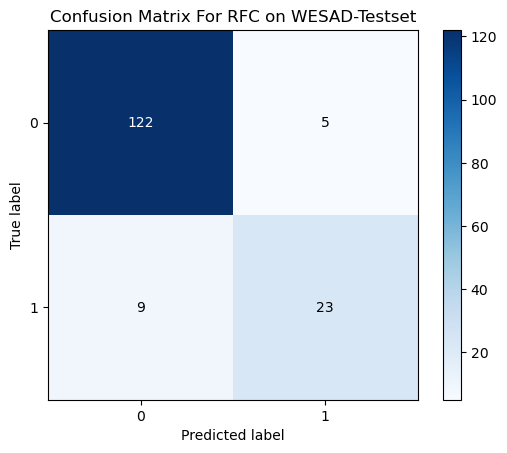

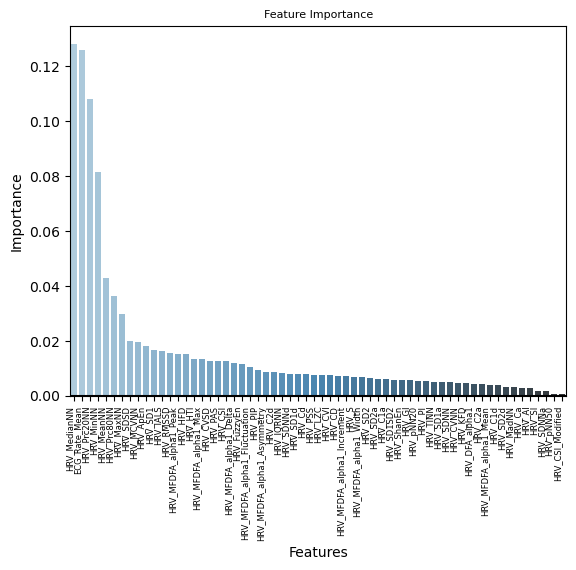

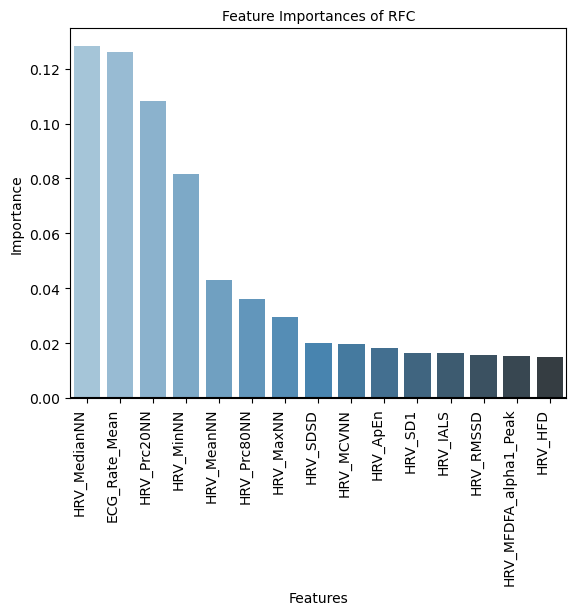

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.957


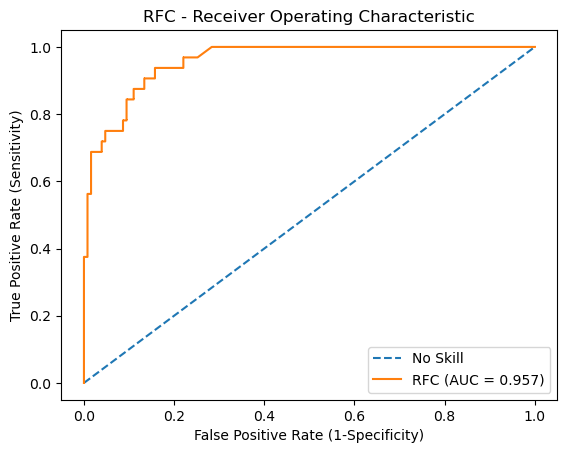

No Skill: PRC AUC=0.201
Logistic: PRC AUC=0.869


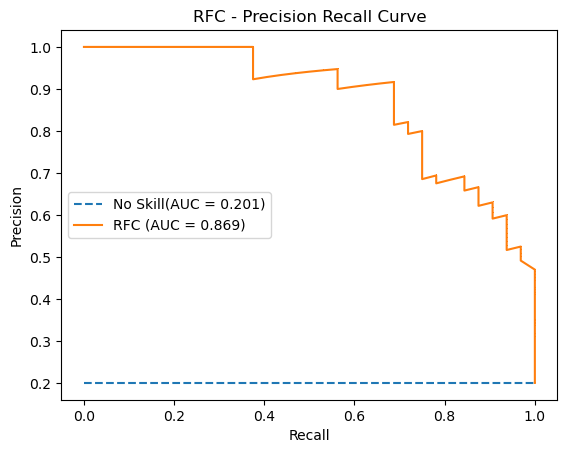

In [7]:
save_path = "plots/wesad/rfc/rfc"
util.plot_model_results(rfc_models, X_test, y_test)
util.plot_confusion_matrix(rfc_models, "RFC on WESAD-Testset", save_path, X_test, y_test)
util.plot_feature_importance_rfc(rfc_models, "RFC", save_path)
util.AUROC_draw_single(rfc_models, "RFC", save_path, X_test, y_test)
util.PRC_draw_single(rfc_models, "RFC", save_path, X_test, y_test)

## SVM

best score: 0.7658928911759101

best parameters: {'C': 4, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

score: 0.9245283018867925

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       127
           1       0.88      0.72      0.79        32

    accuracy                           0.92       159
   macro avg       0.91      0.85      0.87       159
weighted avg       0.92      0.92      0.92       159



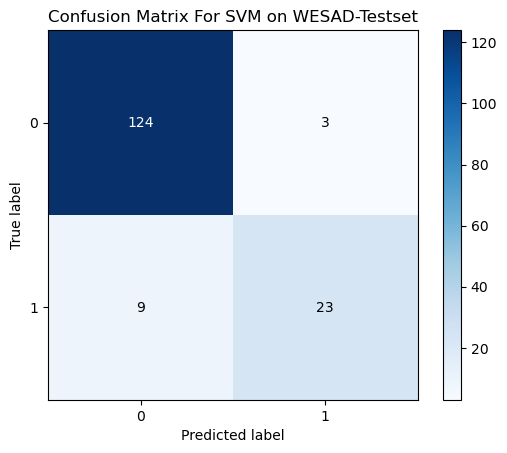

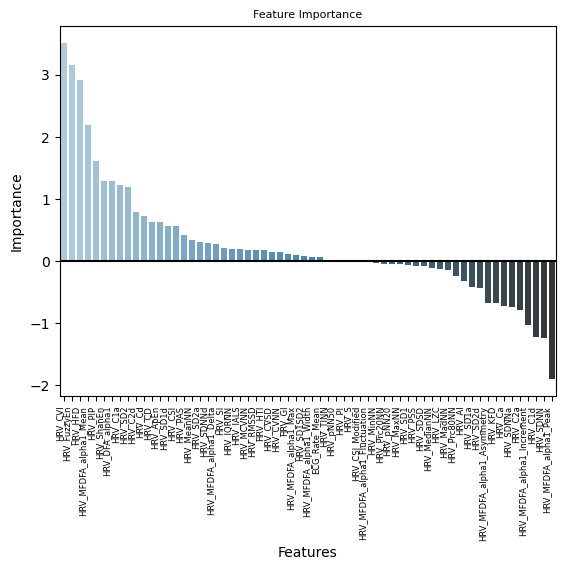

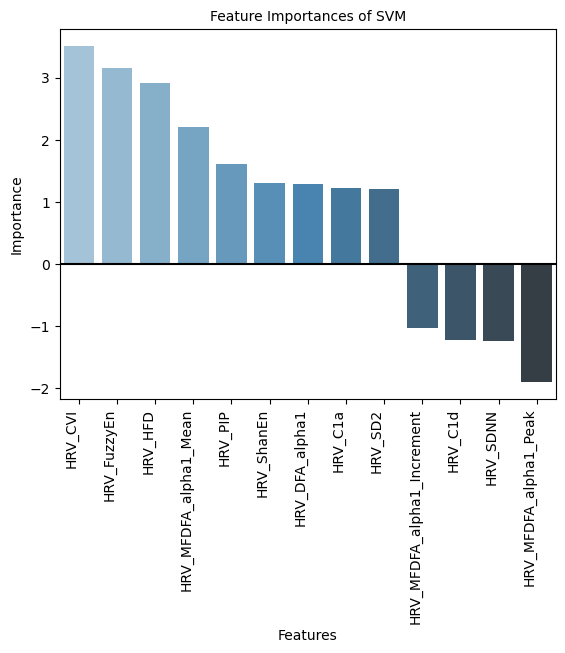

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.955


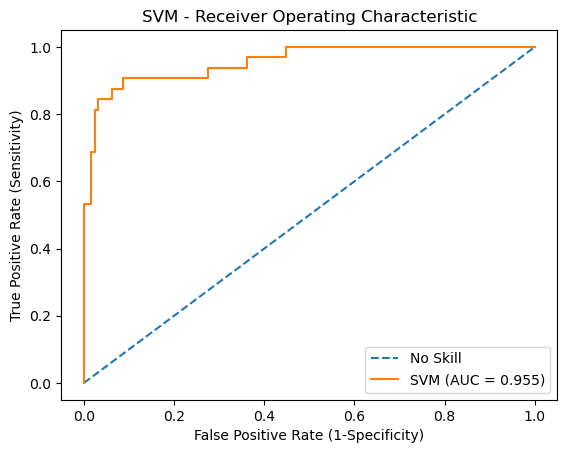

No Skill: PRC AUC=0.201
Logistic: PRC AUC=0.896


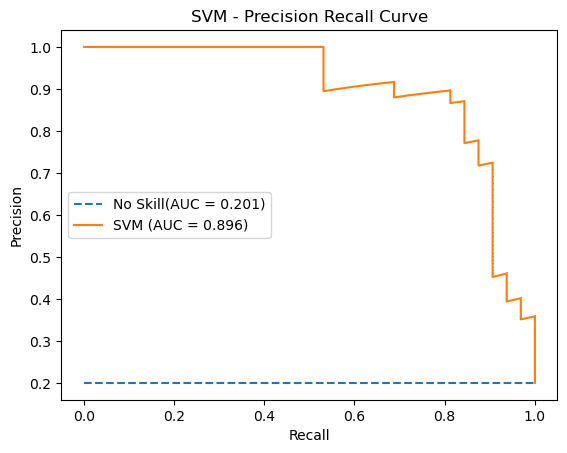

In [8]:
save_path = "plots/wesad/svm/svm"
util.plot_model_results(svm_models, X_test, y_test)
util.plot_confusion_matrix(svm_models, "SVM on WESAD-Testset", save_path, X_test,y_test)
util.plot_feature_importance(svm_models, "SVM", save_path, 1, -1)
util.AUROC_draw_single(svm_models, "SVM", save_path, X_test, y_test)
util.PRC_draw_single(svm_models, "SVM", save_path, X_test, y_test)

## LR

best score: 0.7765120931078379

best parameters: {'C': 32, 'class_weight': None, 'dual': False, 'max_iter': 64, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

score: 0.9308176100628931

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       127
           1       0.86      0.78      0.82        32

    accuracy                           0.93       159
   macro avg       0.90      0.87      0.89       159
weighted avg       0.93      0.93      0.93       159



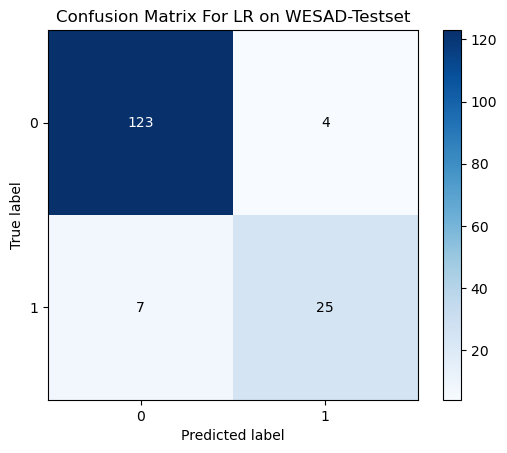

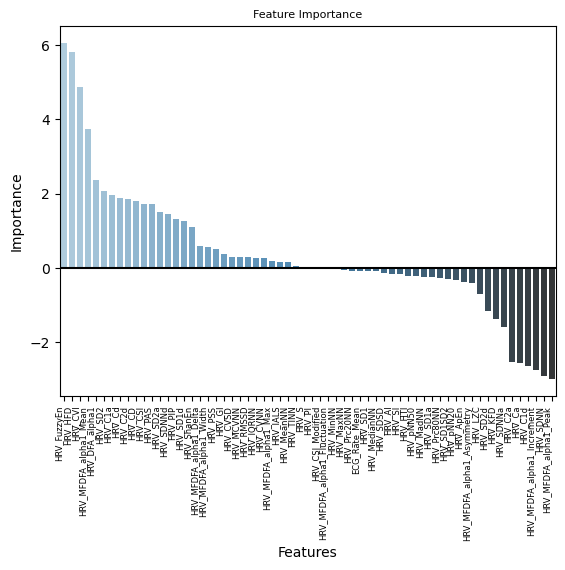

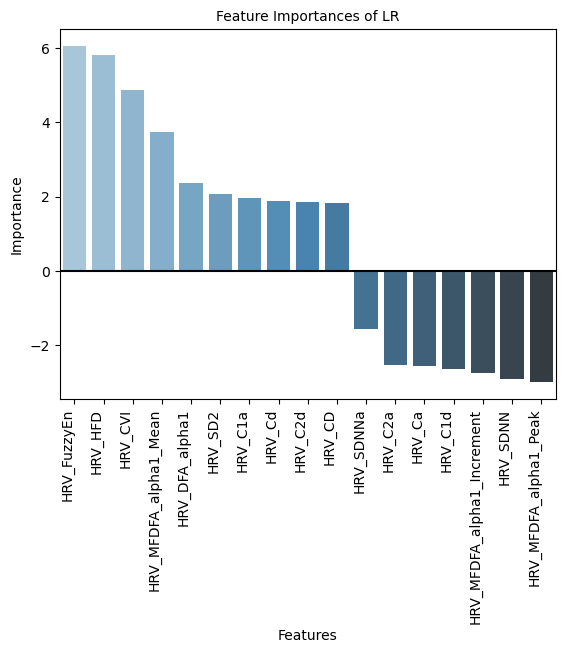

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.946


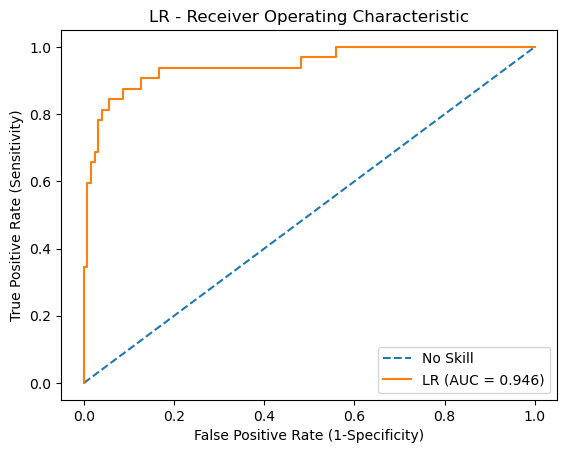

No Skill: PRC AUC=0.201
Logistic: PRC AUC=0.874


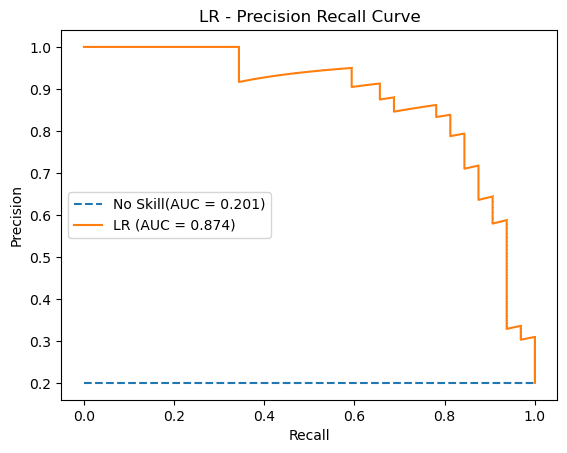

In [9]:
save_path = "plots/wesad/lr/lr"
util.plot_model_results(lr_models, X_test, y_test)
util.plot_confusion_matrix(lr_models, "LR on WESAD-Testset", save_path, X_test, y_test)
util.plot_feature_importance(lr_models, "LR", save_path, 1.8, -1.5)
util.AUROC_draw_single(lr_models, "LR", save_path, X_test, y_test)
util.PRC_draw_single(lr_models, "LR", save_path, X_test, y_test)

## KNN

best score: 0.6838114387529943

best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

score: 0.8930817610062893

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       127
           1       0.86      0.56      0.68        32

    accuracy                           0.89       159
   macro avg       0.88      0.77      0.81       159
weighted avg       0.89      0.89      0.88       159



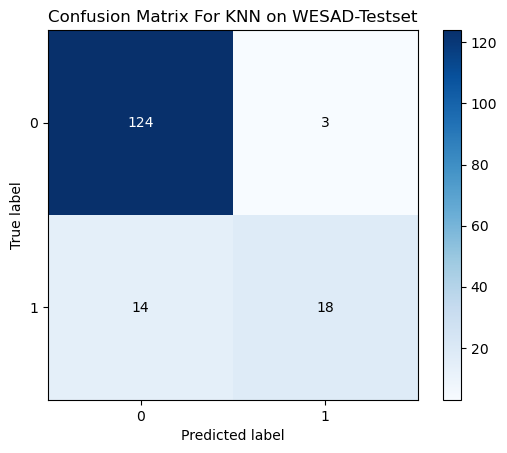

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.944


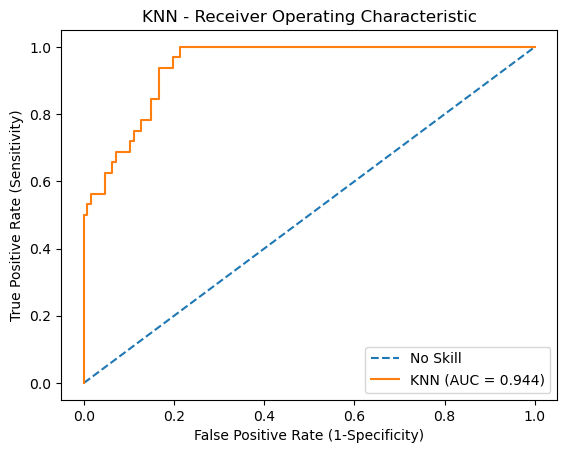

No Skill: PRC AUC=0.201
Logistic: PRC AUC=0.832


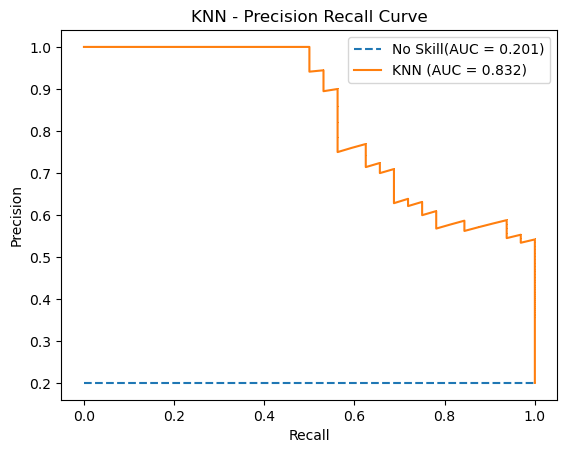

In [10]:
save_path = "plots/wesad/knn/knn"
util.plot_model_results(knn_models, X_test, y_test)
util.plot_confusion_matrix(knn_models, "KNN on WESAD-Testset", save_path, X_test, y_test)
util.AUROC_draw_single(knn_models, "KNN", save_path, X_test, y_test)
util.PRC_draw_single(knn_models, "KNN", save_path, X_test, y_test)

## LDA

best score: 0.7501422387136673

best parameters: {'shrinkage': None, 'solver': 'svd', 'store_covariance': True}

score: 0.9056603773584906

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       127
           1       0.87      0.62      0.73        32

    accuracy                           0.91       159
   macro avg       0.89      0.80      0.84       159
weighted avg       0.90      0.91      0.90       159



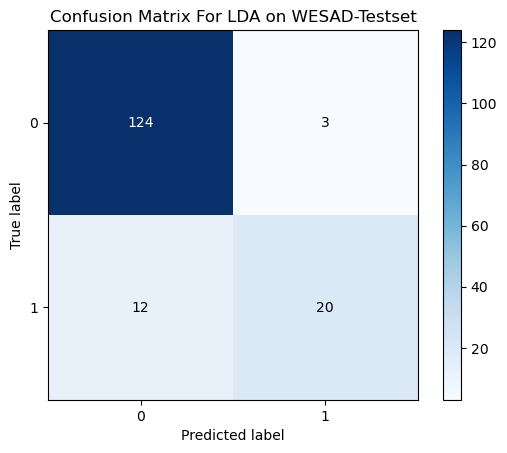

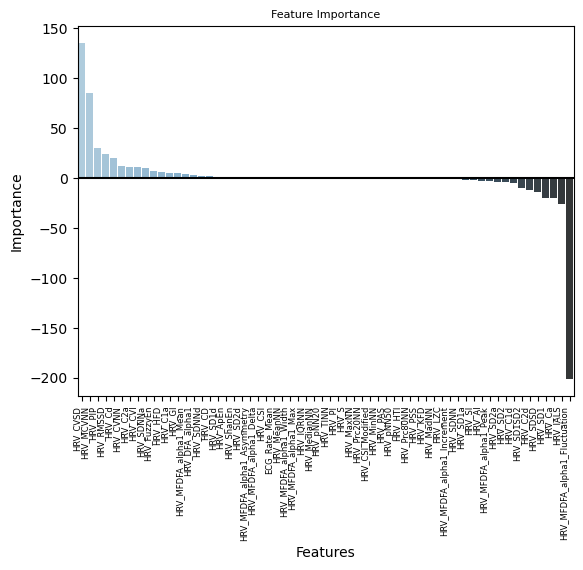

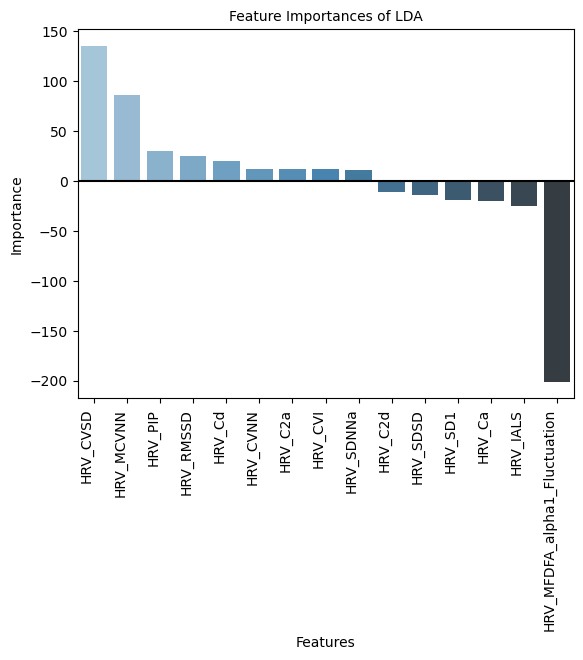

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.959


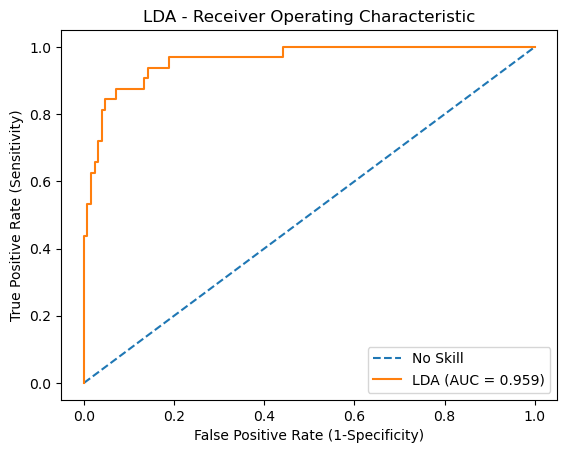

No Skill: PRC AUC=0.201
Logistic: PRC AUC=0.885


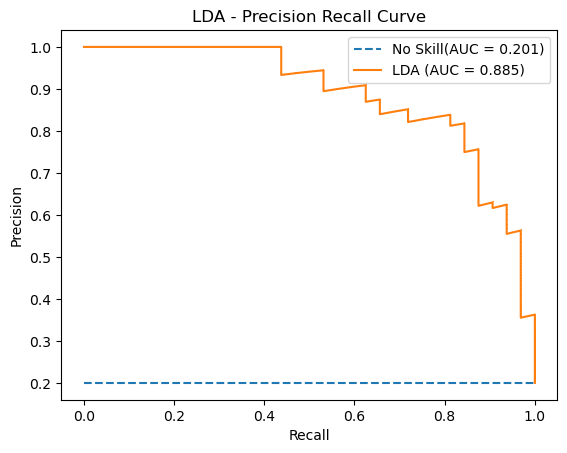

In [11]:
save_path = "plots/wesad/lda/lda"
util.plot_model_results(lda_models, X_test, y_test)
util.plot_confusion_matrix(lda_models, "LDA on WESAD-Testset", save_path, X_test, y_test)
util.plot_feature_importance(lda_models, "LDA", save_path, 10, -10)
util.AUROC_draw_single(lda_models, "LDA", save_path, X_test, y_test)
util.PRC_draw_single(lda_models, "LDA", save_path, X_test, y_test)

## All Models

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.957
SVM: ROC AUC=0.955
LR: ROC AUC=0.946
KNN: ROC AUC=0.944
LDA: ROC AUC=0.959


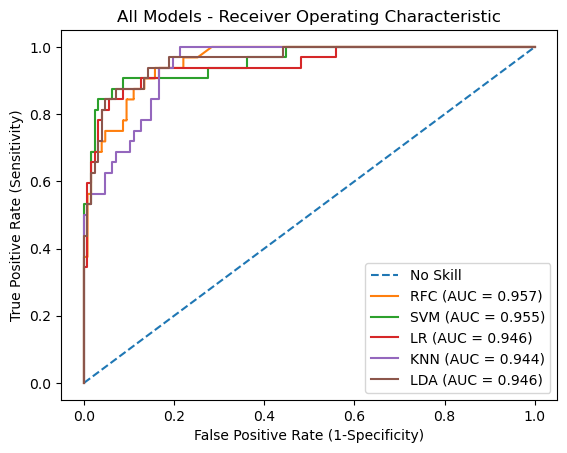

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.869
SVM: PRC AUC=0.896
LR: PRC AUC=0.874
KNN: PRC AUC=0.832
LDA: PRC AUC=0.885


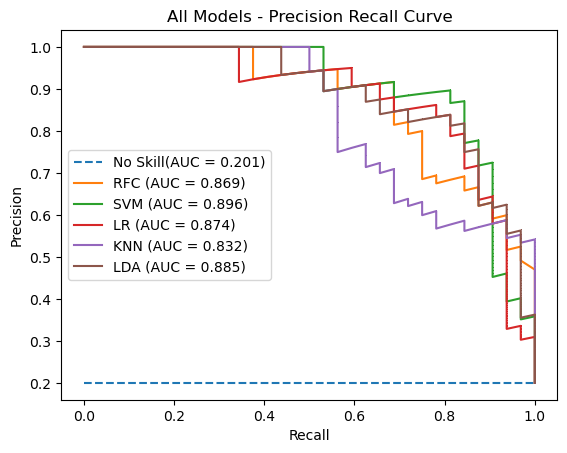

In [12]:
save_path ='plots/wesad'
util.AUROC_draw_all(rfc_models, svm_models, lr_models, knn_models, lda_models, save_path, X_test, y_test)
util.PRC_draw_all(rfc_models, svm_models, lr_models, knn_models, lda_models, save_path, X_test, y_test)

# Compare And Test With Polar Data

## RFC 

best score: 0.7984429598868527

best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 16, 'oob_score': True}

score: 0.6711165048543689

              precision    recall  f1-score   support

           0       0.51      0.28      0.36       275
           1       0.71      0.87      0.78       549

    accuracy                           0.67       824
   macro avg       0.61      0.57      0.57       824
weighted avg       0.64      0.67      0.64       824



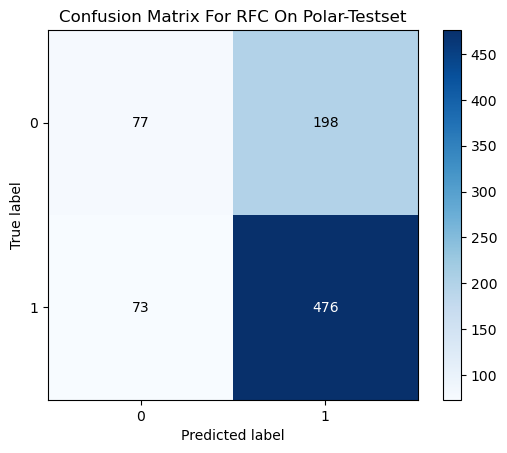

No Skill: ROC AUC=0.500
WESAD: ROC AUC=0.957
Polar: ROC AUC=0.607


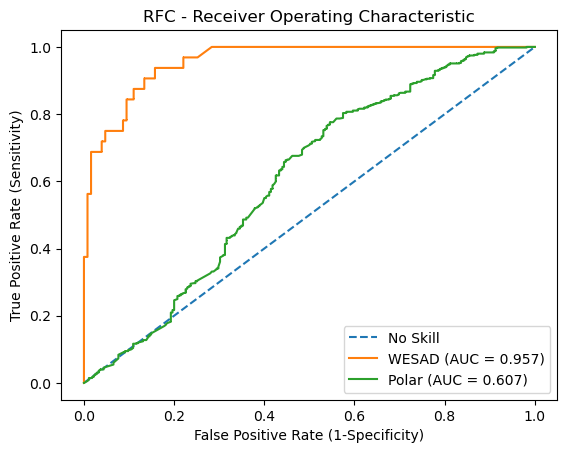

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.869
SVM: PRC AUC=0.709


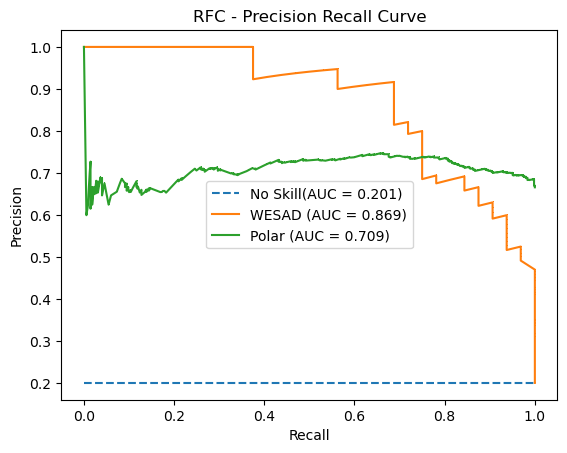

In [13]:
save_path = "plots/comparison/rfc/rfc"
util.plot_model_results(rfc_models, X_polar, y_polar)
util.plot_confusion_matrix(rfc_models, "RFC On Polar-Testset", save_path, X_polar, y_polar)
util.AUROC_draw_two(rfc_models, "RFC", save_path, X_test, y_test, X_polar, y_polar)
util.PRC_draw_two(rfc_models, "RFC", save_path, X_test, y_test, X_polar, y_polar)

## SVM

best score: 0.7658928911759101

best parameters: {'C': 4, 'class_weight': None, 'decision_function_shape': 'ovo', 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}

score: 0.7099514563106796

              precision    recall  f1-score   support

           0       0.63      0.32      0.42       275
           1       0.73      0.91      0.81       549

    accuracy                           0.71       824
   macro avg       0.68      0.61      0.61       824
weighted avg       0.69      0.71      0.68       824



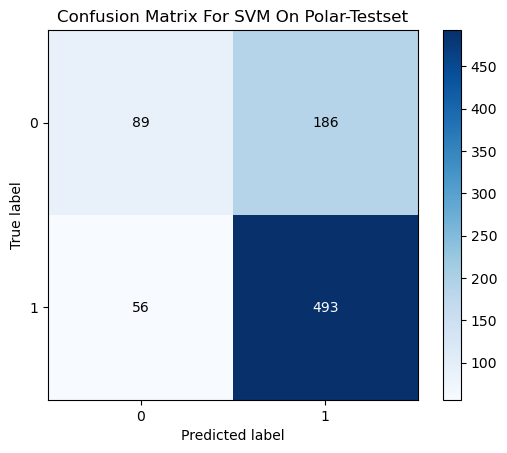

No Skill: ROC AUC=0.500
WESAD: ROC AUC=0.955
Polar: ROC AUC=0.712


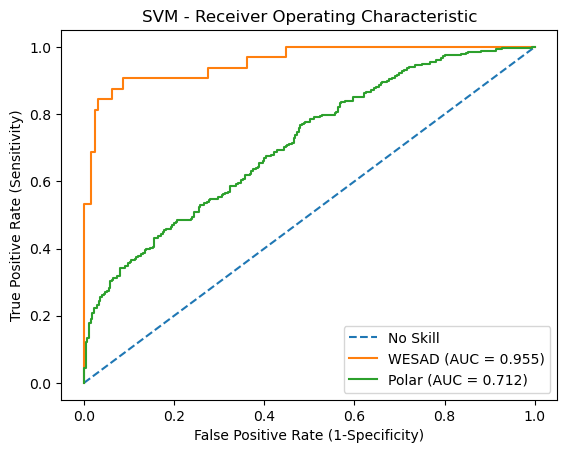

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.896
SVM: PRC AUC=0.836


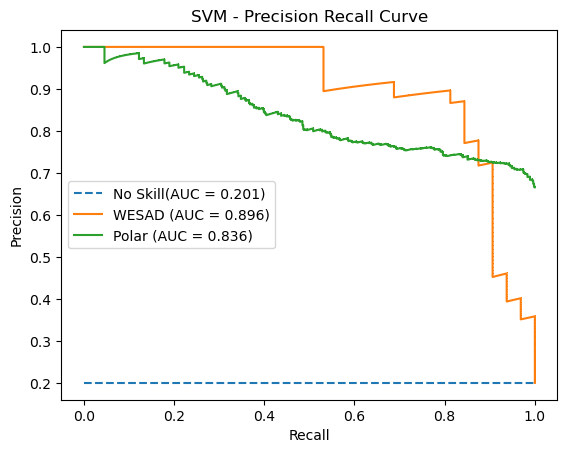

In [14]:
save_path = "plots/comparison/svm/svm"
util.plot_model_results(svm_models, X_polar, y_polar)
util.plot_confusion_matrix(svm_models, "SVM On Polar-Testset", save_path, X_polar, y_polar)
util.AUROC_draw_two(svm_models, "SVM", save_path, X_test, y_test, X_polar, y_polar)
util.PRC_draw_two(svm_models, "SVM", save_path, X_test, y_test, X_polar, y_polar)

## LR

best score: 0.7765120931078379

best parameters: {'C': 32, 'class_weight': None, 'dual': False, 'max_iter': 64, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}

score: 0.6905339805825242

              precision    recall  f1-score   support

           0       0.59      0.23      0.33       275
           1       0.70      0.92      0.80       549

    accuracy                           0.69       824
   macro avg       0.65      0.58      0.56       824
weighted avg       0.67      0.69      0.64       824



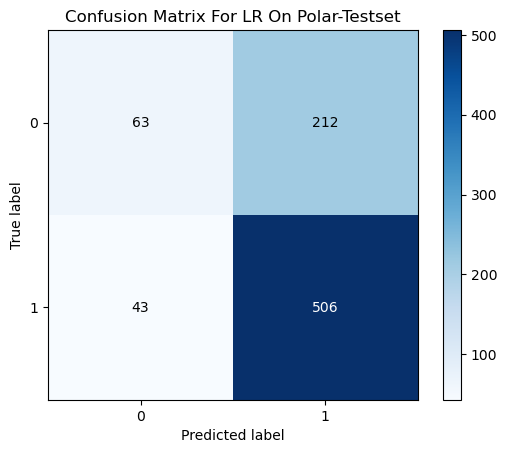

No Skill: ROC AUC=0.500
WESAD: ROC AUC=0.946
Polar: ROC AUC=0.670


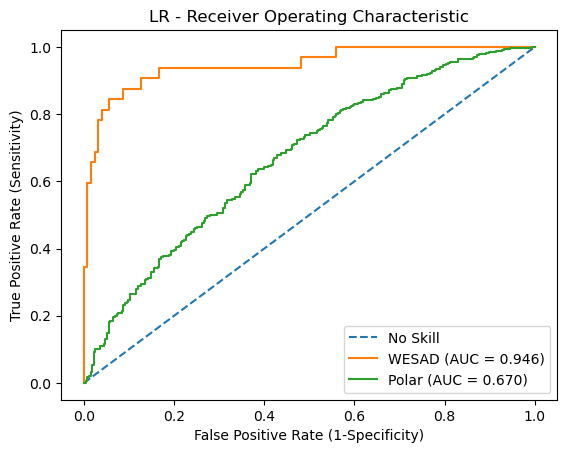

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.874
SVM: PRC AUC=0.779


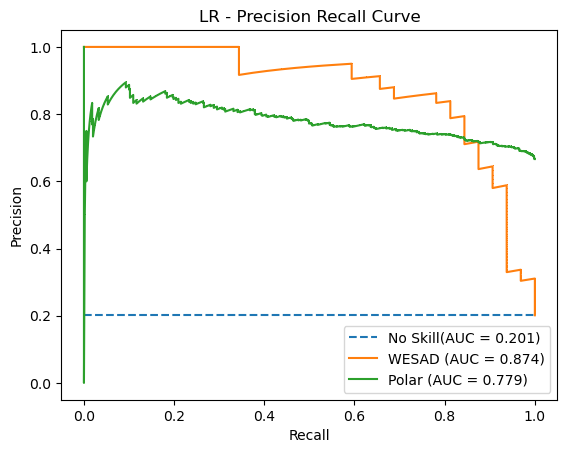

In [15]:
save_path = "plots/comparison/lr/lr"
util.plot_model_results(lr_models, X_polar, y_polar)
util.plot_confusion_matrix(lr_models, "LR On Polar-Testset", save_path, X_polar, y_polar)
util.AUROC_draw_two(lr_models, "LR", save_path, X_test, y_test, X_polar, y_polar)
util.PRC_draw_two(lr_models, "LR", save_path, X_test, y_test, X_polar, y_polar)

## KNN

best score: 0.6838114387529943

best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

score: 0.6480582524271845

              precision    recall  f1-score   support

           0       0.47      0.36      0.41       275
           1       0.71      0.79      0.75       549

    accuracy                           0.65       824
   macro avg       0.59      0.58      0.58       824
weighted avg       0.63      0.65      0.64       824



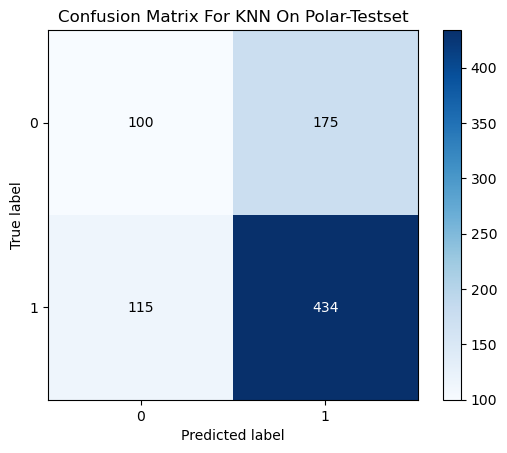

No Skill: ROC AUC=0.500
WESAD: ROC AUC=0.944
Polar: ROC AUC=0.600


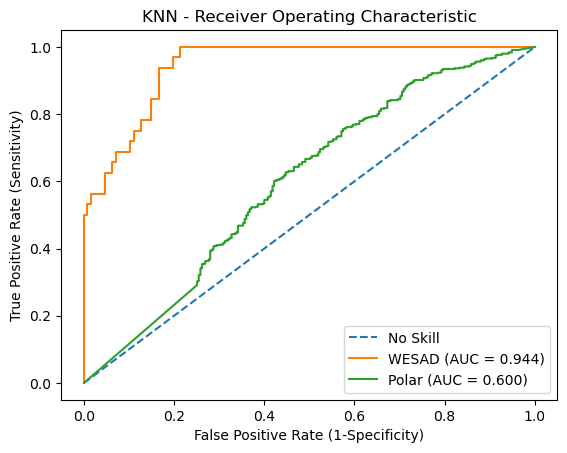

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.832
SVM: PRC AUC=0.757


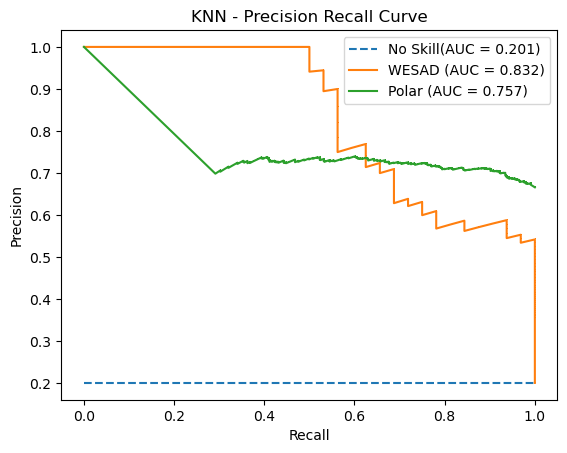

In [16]:
save_path = "plots/comparison/knn/knn"
util.plot_model_results(knn_models, X_polar, y_polar)
util.plot_confusion_matrix(knn_models, "KNN On Polar-Testset", save_path, X_polar, y_polar)
util.AUROC_draw_two(knn_models, "KNN", save_path, X_test, y_test, X_polar, y_polar)
util.PRC_draw_two(knn_models, "KNN", save_path, X_test, y_test, X_polar, y_polar)

## LDA

best score: 0.7501422387136673

best parameters: {'shrinkage': None, 'solver': 'svd', 'store_covariance': True}

score: 0.7063106796116505

              precision    recall  f1-score   support

           0       0.59      0.40      0.48       275
           1       0.74      0.86      0.80       549

    accuracy                           0.71       824
   macro avg       0.66      0.63      0.64       824
weighted avg       0.69      0.71      0.69       824



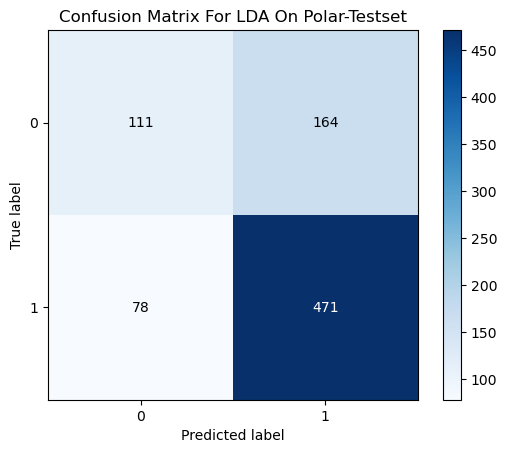

No Skill: ROC AUC=0.500
WESAD: ROC AUC=0.959
Polar: ROC AUC=0.727


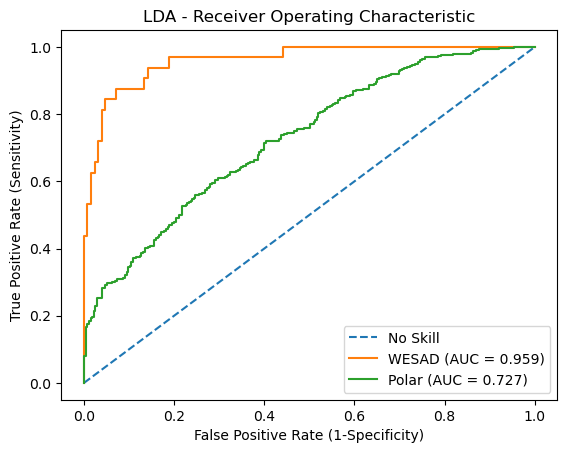

No Skill: PRC AUC=0.201
RFC: PRC AUC=0.885
SVM: PRC AUC=0.844


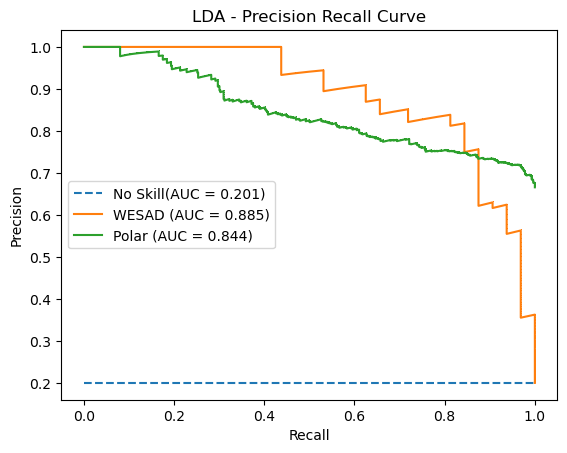

In [17]:
save_path = "plots/comparison/lda/lda"
util.plot_model_results(lda_models, X_polar, y_polar)
util.plot_confusion_matrix(lda_models, "LDA On Polar-Testset", save_path, X_polar, y_polar)
util.AUROC_draw_two(lda_models, "LDA", save_path, X_test, y_test, X_polar, y_polar)
util.PRC_draw_two(lda_models, "LDA", save_path, X_test, y_test, X_polar, y_polar)

## ALL Models

No Skill: ROC AUC=0.500
RFC: ROC AUC=0.607
SVM: ROC AUC=0.712
LR: ROC AUC=0.670
KNN: ROC AUC=0.600
LDA: ROC AUC=0.727


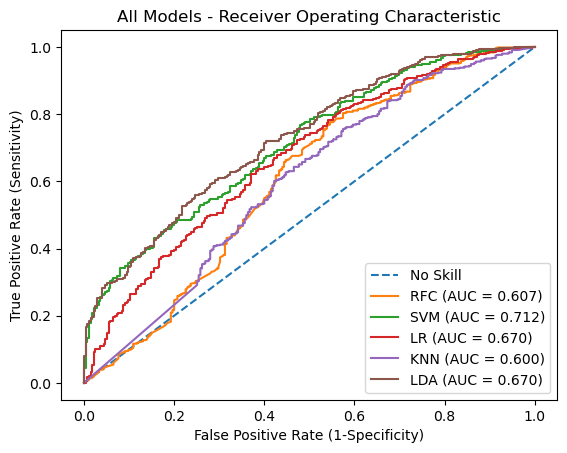

No Skill: PRC AUC=0.666
RFC: PRC AUC=0.709
SVM: PRC AUC=0.836
LR: PRC AUC=0.779
KNN: PRC AUC=0.757
LDA: PRC AUC=0.844


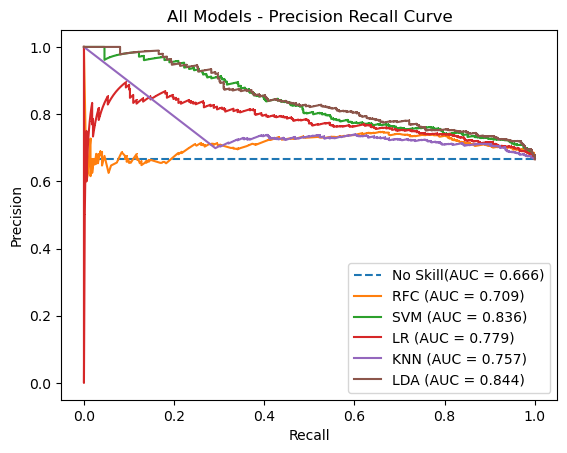

In [18]:
save_path = 'plots/polar'
util.AUROC_draw_all(rfc_models, svm_models, lr_models, knn_models, lda_models, save_path, X_polar, y_polar)
util.PRC_draw_all(rfc_models, svm_models, lr_models, knn_models, lda_models, save_path, X_polar, y_polar)